In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy.stats as stats
import statistics as stat
from matplotlib import cm
import operator

In [2]:
os.chdir("C:\\Users\\xiaoling\\Desktop\\data_scientist_udacity\\term2 project 1\\developer_survey_2018")
df = pd.read_csv('survey_results_public.csv')
df.shape

C:\Users\xiaoling\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(98855, 129)

In [3]:
#Count respondent number in each country for male and female
genderCount = df.groupby(["Country","Gender"])['Respondent'].count().to_frame().reset_index()
#genderCountPivot = genderCount.pivot(values='Respondent', index='Country', columns='Gender')[["Female", "Male"]].reset_index()
genderCountPivot = genderCount.pivot(values='Respondent', index='Country', columns='Gender')[["Female", "Male"]].rename_axis(None, axis=1)
genderCountPivot.head()

,Female,Male
Country,,
Afghanistan,1.0,17.0
Albania,4.0,45.0
Algeria,3.0,55.0
Andorra,1.0,5.0
Angola,NaN,2.0


In [4]:
#calaculate the proportion of male and female
female = genderCountPivot['Female'].sum(axis=0)
male = genderCountPivot['Male'].sum(axis=0)

print("total responders", female + male)
print("% of female", female/(female+male)*100) 
print("% of male", male/(female+male)*100) 

total responders 63483.0
% of female 6.340280074980703
% of male 93.65971992501929


In [5]:
#find how many countries without female respondent
country_noFemale = genderCountPivot[genderCountPivot['Female'].isnull()].sort_values('Male',  ascending=False).reset_index()
country_noFemale.Country.count()

55

In [6]:
#Generate a table with female and male number listed for each country
genderCountPivot1 = genderCountPivot.dropna(subset=['Female']).sort_values('Male', ascending=False)
genderCountPivot1.head(10)

,Female,Male
Country,,
United States,1288.0,13914.0
India,440.0,6213.0
United Kingdom,256.0,4260.0
Germany,193.0,4205.0
Canada,208.0,2201.0
Russian Federation,95.0,1632.0
France,83.0,1629.0
Brazil,58.0,1513.0
Australia,85.0,1389.0


In [9]:
country_noFemale.head() # find country without female responders

,Country,Female,Male
0,Dominican Republic,NaN,69.0
1,Azerbaijan,NaN,44.0
2,Uganda,NaN,37.0
3,Uzbekistan,NaN,29.0
4,United Republic of Tanzania,NaN,26.0


In [8]:
df['Gender'].isnull().sum()

0

In [7]:
df = df.dropna(subset=['ConvertedSalary', 'Gender'], axis=0) #removed rows contain NaN in "ConvertedSalary" and ”Gender“ columns

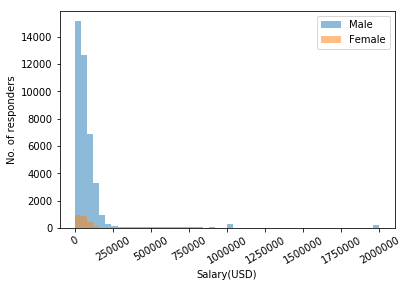

In [10]:
#histogram plot to check data distribution, whether normal distribution
#plt.hist(df['ConvertedSalary'], bins = 50, alpha = 0.5, label = 'All')
plt.hist(df[df['Gender'] == 'Male'].ConvertedSalary, bins = 50, alpha = 0.5, label = 'Male')
plt.hist(df[df['Gender'] == 'Female'].ConvertedSalary, bins = 50, alpha = 0.5, label = 'Female')
plt.legend(loc='upper right')
plt.xlabel('Salary(USD)')
plt.ylabel('No. of responders')
plt.xticks(rotation=30)
plt.show() #right skewed distribution

In [11]:
#mann whiteny test because data are not assuming normal distribution; to see the difference of salary between female and male
def pValue(df, country):
    if len(country) == 1:
        df1 = df[df['Country'] == country]
    else:
        df1 = df 
    maleSalary = list(df[df['Gender'] == 'Male'].ConvertedSalary)
    femaleSalary = list(df[df['Gender'] == 'Female'].ConvertedSalary)
    u_statistic, pVal = stats.mannwhitneyu(maleSalary, femaleSalary)
    print("median of male salary:",stat.median(maleSalary),"\nmedian of female salary:", stat.median(femaleSalary),  "\np value is" , pVal)

pValue(df,np.unique(df['Country']))# In general the salary difference between females and males

median of male salary: 56100.0 
median of female salary: 54336.0 
p value is 0.0015789413354508127


In [13]:
#calculate salary difference for each country
genderCountPivot2=genderCountPivot1[(genderCountPivot1.Female >= 10) & (genderCountPivot1.Male >= 10)]
nrow = genderCountPivot2.shape[0]

pValue1=[]
female_median=[]
male_median=[]
for x in range(0, nrow):
    maleSalary = list(df[operator.and_(df['Gender'] == 'Male', df['Country']==genderCountPivot2.index[x])].ConvertedSalary) 
    femaleSalary = list(df[operator.and_(df['Gender'] == 'Female', df['Country']==genderCountPivot2.index[x])].ConvertedSalary) 
    u_statistic, pVal = stats.mannwhitneyu(maleSalary, femaleSalary) 
    pValue1.append(pVal)
    female_median.append(stat.median(femaleSalary))
    male_median.append(stat.median(maleSalary))
    
genderCountPivot2['pVal'] = pValue1
genderCountPivot2['female_median'] = female_median
genderCountPivot2['male_median'] = male_median

genderCountPivot2.head()

C:\Users\xiaoling\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xiaoling\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xiaoling\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

,Female,Male,pVal,female_median,male_median
Country,,,,,
United States,1288.0,13914.0,3.865933e-21,85000.0,100000.0
India,440.0,6213.0,1.593630e-04,7512.0,9768.0
United Kingdom,256.0,4260.0,4.318474e-08,50005.0,63896.0
Germany,193.0,4205.0,3.656030e-02,58746.0,61488.0
Canada,208.0,2201.0,1.237278e-02,60391.0,64417.0


In [14]:
sum(genderCountPivot2['pVal']< 0.05)

22

In [15]:
def piePlt(df, country, parameterCol):
    if len(country) == 1:
        df1 = df[df['Country'] == country]
    else:
        df1 = df    
    classCount = df1.groupby(["Gender", parameterCol])["Respondent"].count().to_frame().reset_index()
    classCountPivot = classCount.pivot(values='Respondent', index=parameterCol, columns='Gender').reset_index()
    classCountPivot = classCountPivot[[parameterCol, "Female", "Male"]].set_index(parameterCol).fillna(0)

    plt.style.use('ggplot')
    cs=cm.Set1(np.arange(40)/40.)

    def my_autopct(pct):
        return ('%.2f' % pct) if pct > 2 else ''

    fig, axes = plt.subplots(nrows=1, ncols=2)
    for ax, col in zip(axes.flat, classCountPivot.columns):
        pie = ax.pie(classCountPivot[col], labels=None, autopct=my_autopct,  pctdistance=1.2, colors=sns.color_palette("Paired"))
        ax.set(ylabel='', title=col, aspect='equal')

    plt.legend(pie[0],labels=classCountPivot.index, bbox_to_anchor=(1.2,1), loc="upper left")
    plt.show()
    


C:\Users\xiaoling\Anaconda3\lib\site-packages\matplotlib\legend.py:1266: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


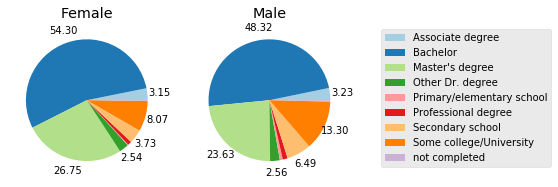

In [16]:
df['FormalEducation']=df['FormalEducation'].replace({"Bachelor’s degree (BA, BS, B.Eng., etc.)":"Bachelor", 
                                        "Some college/university study without earning a degree":"Some college/University",
                                      "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)":"Secondary school",
                                      "Master’s degree (MA, MS, M.Eng., MBA, etc.)":"Master's degree",
                                       "Professional degree (JD, MD, etc.)":"Professional degree",
                                       "Other doctoral degree (Ph.D, Ed.D., etc.)":"Other Dr. degree",
                                       "I never completed any formal education":"not completed"})
piePlt(df, np.unique(df['Country']), 'FormalEducation')#pie plot for education level between female and male

C:\Users\xiaoling\Anaconda3\lib\site-packages\matplotlib\legend.py:1266: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


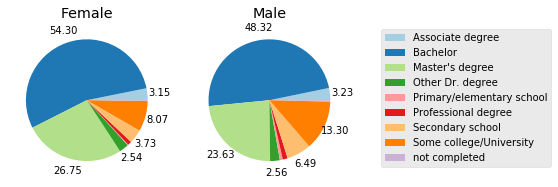

In [17]:
piePlt(df,'United States', 'FormalEducation') # plot education levels in United States

C:\Users\xiaoling\Anaconda3\lib\site-packages\matplotlib\legend.py:1266: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword arguments, some "


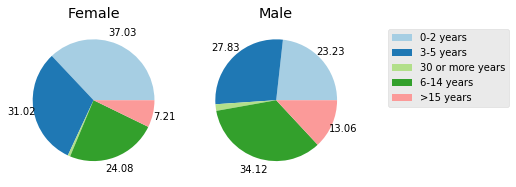

In [18]:
#Are there differences of coding experiences between females and males?
df['YearsCodingProf']=df['YearsCodingProf'].replace({"6-8 years":"6-14 years", 
                                        "9-11 years":"6-14 years",
                                      "12-14 years":"6-14 years",
                                      "15-17 years":">15 years",
                                       "18-20 years":">15 years",
                                       "21-23 years":">15 years",
                                       "24-26 years":">15 years",
                                        "27-29 years":">15 years"})
piePlt(df, np.unique(df['Country']), 'YearsCodingProf') #

In [19]:
#df_2yCoding = df[(df['YearsCodingProf'] == '3-5 years') & (df['Country'] == 'United States')]
df_3yCoding = df[df['YearsCodingProf'] == '3-5 years']
pValue(df_3yCoding,'United States') # calculate the salary difference between females and males in United States have 3-5 years of coding experience

median of male salary: 46992.0 
median of female salary: 55906.0 
p value is 1.716985697716073e-08
